In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
from matplotlib import pyplot
import seaborn as sns
from lifelines.statistics import survival_difference_at_fixed_point_in_time_test
from scipy import stats

In [2]:
df=pd.read_csv("C:/Users/damps/Documents/heart_transplant.csv")

In [3]:
df.head(10)

,id,acceptyear,age,survived,survtime,prior,transplant,wait
0,15,68,53,dead,1,no,control,NaN
1,43,70,43,dead,2,no,control,NaN
2,61,71,52,dead,2,no,control,NaN
3,75,72,52,dead,2,no,control,NaN
4,6,68,54,dead,3,no,control,NaN
5,42,70,36,dead,3,no,control,NaN
6,54,71,47,dead,3,no,control,NaN
7,38,70,41,dead,5,no,treatment,5.0
8,85,73,47,dead,5,no,control,NaN
9,2,68,51,dead,6,no,control,NaN


In [4]:
df.describe()

,id,acceptyear,age,survtime,wait
count,103.000000,103.000000,103.000000,103.000000,69.000000
mean,51.398058,70.621359,44.640777,310.174757,38.420290
std,30.038322,1.900034,9.797813,428.040346,50.103835
min,1.000000,67.000000,8.000000,1.000000,1.000000
25%,26.500000,69.000000,41.000000,33.500000,10.000000
50%,49.000000,71.000000,47.000000,90.000000,26.000000
75%,77.500000,72.000000,52.000000,412.000000,46.000000
max,103.000000,74.000000,64.000000,1799.000000,310.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          103 non-null    int64  
 1   acceptyear  103 non-null    int64  
 2   age         103 non-null    int64  
 3   survived    103 non-null    object 
 4   survtime    103 non-null    int64  
 5   prior       103 non-null    object 
 6   transplant  103 non-null    object 
 7   wait        69 non-null     float64
dtypes: float64(1), int64(4), object(3)
memory usage: 6.6+ KB


In [6]:
df1 = pd.get_dummies(columns = ['survived','prior', 'transplant'], data=df)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    103 non-null    int64  
 1   acceptyear            103 non-null    int64  
 2   age                   103 non-null    int64  
 3   survtime              103 non-null    int64  
 4   wait                  69 non-null     float64
 5   survived_alive        103 non-null    uint8  
 6   survived_dead         103 non-null    uint8  
 7   prior_no              103 non-null    uint8  
 8   prior_yes             103 non-null    uint8  
 9   transplant_control    103 non-null    uint8  
 10  transplant_treatment  103 non-null    uint8  
dtypes: float64(1), int64(4), uint8(6)
memory usage: 4.8 KB


In [8]:
df1.head(50)

,id,acceptyear,age,survtime,wait,survived_alive,survived_dead,prior_no,prior_yes,transplant_control,transplant_treatment
0,15,68,53,1,NaN,0,1,1,0,1,0
1,43,70,43,2,NaN,0,1,1,0,1,0
2,61,71,52,2,NaN,0,1,1,0,1,0
3,75,72,52,2,NaN,0,1,1,0,1,0
4,6,68,54,3,NaN,0,1,1,0,1,0
5,42,70,36,3,NaN,0,1,1,0,1,0
6,54,71,47,3,NaN,0,1,1,0,1,0
7,38,70,41,5,5.0,0,1,1,0,0,1
8,85,73,47,5,NaN,0,1,1,0,1,0
9,2,68,51,6,NaN,0,1,1,0,1,0


In [16]:
df2 =df1[df1.prior_no==0]
df3 = df1[df1.prior_yes==0]

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 30 to 99
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    12 non-null     int64  
 1   acceptyear            12 non-null     int64  
 2   age                   12 non-null     int64  
 3   survtime              12 non-null     int64  
 4   wait                  12 non-null     float64
 5   survived_alive        12 non-null     uint8  
 6   survived_dead         12 non-null     uint8  
 7   prior_no              12 non-null     uint8  
 8   prior_yes             12 non-null     uint8  
 9   transplant_control    12 non-null     uint8  
 10  transplant_treatment  12 non-null     uint8  
dtypes: float64(1), int64(4), uint8(6)
memory usage: 648.0 bytes


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    91 non-null     int64  
 1   acceptyear            91 non-null     int64  
 2   age                   91 non-null     int64  
 3   survtime              91 non-null     int64  
 4   wait                  57 non-null     float64
 5   survived_alive        91 non-null     uint8  
 6   survived_dead         91 non-null     uint8  
 7   prior_no              91 non-null     uint8  
 8   prior_yes             91 non-null     uint8  
 9   transplant_control    91 non-null     uint8  
 10  transplant_treatment  91 non-null     uint8  
dtypes: float64(1), int64(4), uint8(6)
memory usage: 4.8 KB


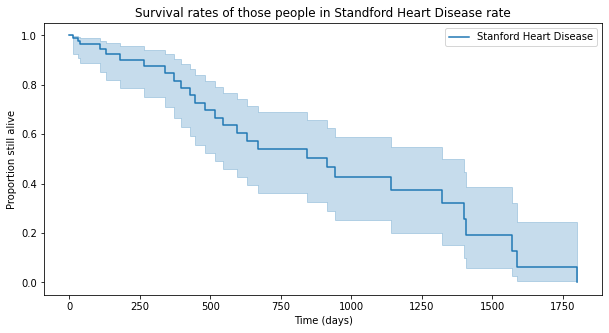

In [47]:
kmf = KaplanMeierFitter(label='Stanford Heart Disease')
kmf = kmf.fit(durations = df1['survtime'], event_observed = df1['survived_alive'])
kmf.plot(figsize=(10,5))
plt.title('Survival rates of those people in Standford Heart Disease rate')
plt.ylabel('Proportion still alive')
plt.xlabel('Time (days)')
plt.show()

Text(0, 0.5, 'Survival probability')

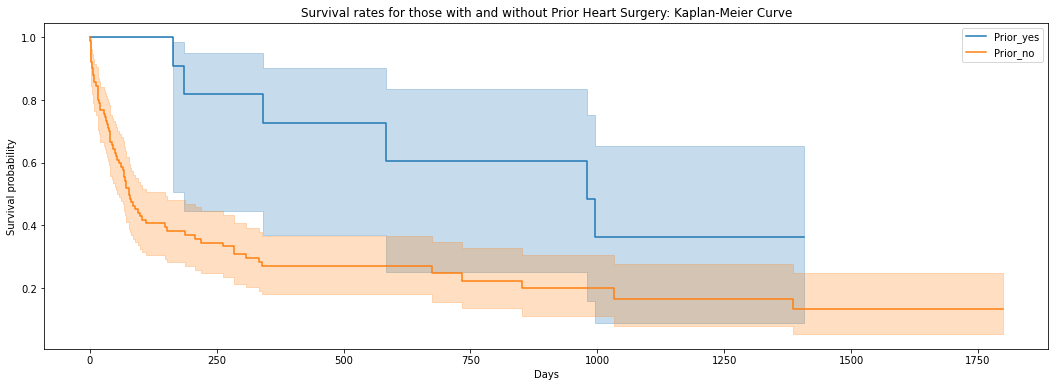

In [13]:
kmf = KaplanMeierFitter()
kmf.fit(df2.survtime, df2.survived_dead)
kmf.plot(label='Prior_yes', figsize=(18, 6))
kmf.fit(df3.survtime, df3.survived_dead)
kmf.plot(label='Prior_no')
plt.title('Survival rates for those with and without Prior Heart Surgery: Kaplan-Meier Curve')
plt.xlabel('Days')
plt.ylabel('Survival probability')

In [22]:
df5 = df1[['survived_alive', 'prior_no']]
dfd = pd.get_dummies(df5, drop_first=True)
dfd['survtime'] = df1.survtime
dfd.rename(columns={'survived_alive':'Prior Surgery_yes'}, inplace=True)

In [23]:
dfd.head(50)

,Prior Surgery_yes,prior_no,survtime
0,0,1,1
1,0,1,2
2,0,1,2
3,0,1,2
4,0,1,3
5,0,1,3
6,0,1,3
7,0,1,5
8,0,1,5
9,0,1,6


In [24]:
cph = CoxPHFitter()
cph.fit(dfd, duration_col='survtime', event_col='prior_no')
cph.print_summary(style='ascii')

<lifelines.CoxPHFitter: fitted with 103 total observations, 12 right-censored observations>
             duration col = 'survtime'
                event col = 'prior_no'
      baseline estimation = breslow
   number of observations = 103
number of events observed = 91
   partial log-likelihood = -329.68
         time fit was run = 2021-03-31 19:58:32 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
Prior Surgery_yes  -1.29       0.27       0.27            -1.83            -0.76                 0.16                 0.47

                      z      p   -log2(p)
covariate                                
Prior Surgery_yes -4.72 <0.005      18.67
---
Concordance = 0.64
Partial AIC = 661.37
log-likelihood ratio test = 26.74 on 1 df
-log2(p) of ll-ratio test = 22.04



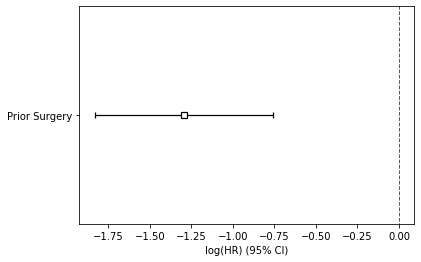

In [21]:
cph.plot()

In [78]:
df6 = df1[['survived_alive', 'transplant_treatment']]
dfe = pd.get_dummies(df6, drop_first=True)
dfe['survtime'] = df1.survtime
dfe.rename(columns={'survived_alive':'yes_transplant'}, inplace=True)

In [79]:
cph1 = CoxPHFitter()
cph1.fit(dfe, duration_col='survtime', event_col='transplant_treatment')
cph1.print_summary(style='ascii')

<lifelines.CoxPHFitter: fitted with 103 total observations, 34 right-censored observations>
             duration col = 'survtime'
                event col = 'transplant_treatment'
      baseline estimation = breslow
   number of observations = 103
number of events observed = 69
   partial log-likelihood = -226.00
         time fit was run = 2021-03-31 21:21:12 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
yes_transplant  -1.07       0.34       0.28            -1.62            -0.52                 0.20                 0.60

                   z      p   -log2(p)
covariate                             
yes_transplant -3.81 <0.005      12.79
---
Concordance = 0.64
Partial AIC = 454.00
log-likelihood ratio test = 15.80 on 1 df
-log2(p) of ll-ratio test = 13.79



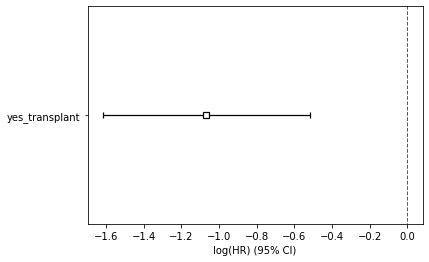

In [80]:
cph1.plot()

In [25]:
df1.head(15)

,id,acceptyear,age,survtime,wait,survived_alive,survived_dead,prior_no,prior_yes,transplant_control,transplant_treatment
0,15,68,53,1,NaN,0,1,1,0,1,0
1,43,70,43,2,NaN,0,1,1,0,1,0
2,61,71,52,2,NaN,0,1,1,0,1,0
3,75,72,52,2,NaN,0,1,1,0,1,0
4,6,68,54,3,NaN,0,1,1,0,1,0
5,42,70,36,3,NaN,0,1,1,0,1,0
6,54,71,47,3,NaN,0,1,1,0,1,0
7,38,70,41,5,5.0,0,1,1,0,0,1
8,85,73,47,5,NaN,0,1,1,0,1,0
9,2,68,51,6,NaN,0,1,1,0,1,0


In [58]:
ind = df1['transplant_control'] == 1

In [59]:
survival_time_with_prior_surgery, survival_status_with_prior_surgery = df1.loc[ind, 'survtime'],df1.loc[ind, 'survived_dead']

survival_time_without_prior_surgery, survival_status_without_prior_surgery = df1.loc[~ind, 'survtime'],df1.loc[~ind, 'survived_dead']

In [60]:
survival_time_with_prior_surgery, survival_status_with_prior_surgery.head()

(0        1
 1        2
 2        2
 3        2
 4        3
 5        3
 6        3
 8        5
 9        6
 10       6
 11       8
 12       9
 13      11
 14      12
 16      16
 19      18
 20      21
 21      21
 24      31
 25      32
 26      35
 27      36
 28      37
 31      40
 32      40
 35      50
 43      69
 50      85
 54     102
 58     149
 66     263
 72     340
 77     427
 98    1400
 Name: survtime, dtype: int64, 0    1
 1    1
 2    1
 3    1
 4    1
 Name: survived_dead, dtype: uint8)

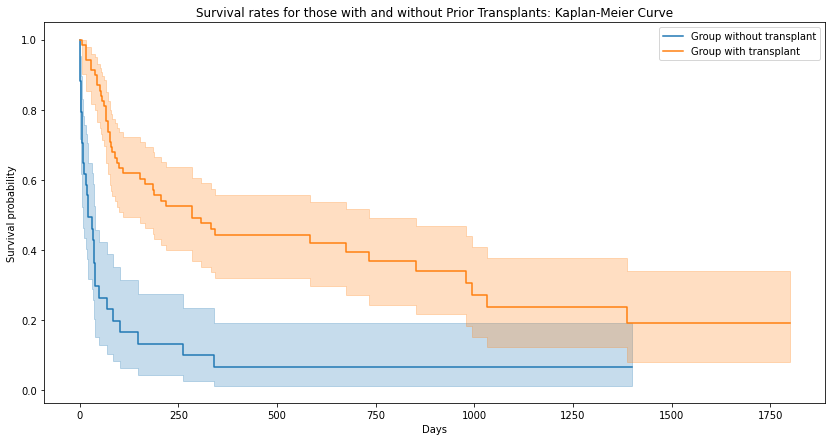

In [77]:
plt.figure(figsize=(14,7))
kmf_with_transplant = KaplanMeierFitter(label='Group without transplant').fit(durations=survival_time_with_prior_surgery, event_observed=survival_status_with_prior_surgery)
kmf_without_transplant = KaplanMeierFitter(label='Group with transplant').fit(durations=survival_time_without_prior_surgery, event_observed=survival_status_without_prior_surgery)

kmf_with_transplant.plot()
kmf_without_transplant.plot()
plt.title('Survival rates for those with and without Prior Transplants: Kaplan-Meier Curve')
plt.xlabel('Days')
plt.ylabel('Survival probability')
plt.show()

In [76]:
results = survival_difference_at_fixed_point_in_time_test(point_in_time=150, 
                                                          fitterA=kmf_with_transplant, 
                                                          fitterB=kmf_without_transplant)
print('Chi-squared(1) Test statistic='+str(results.test_statistic) + ' p-value='+str(results.p_value))

Chi-squared(1) Test statistic=22.081667674988594 p-value=2.6129321818149433e-06


In [8]:
df7 = df[df.survived == 'dead']
df8 = df[df.survived == 'alive']

In [24]:
df7.age.mean()

46.21333333333333

In [10]:
df8.age.mean()

40.42857142857143

In [13]:
t2, p2 = stats.ttest_ind(df7['age'],df8['age'])
print("t = " + str(t2))
print("p = " + str(p2))

t = 2.750370997583591
p = 0.007055238899532413


In [20]:
df10 =df1[df1.transplant_control==0]
df11 = df1[df1.transplant_treatment==0]

In [21]:
df10.age.mean()

45.47826086956522

In [22]:
df11.age.mean()

42.94117647058823